In [49]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------------------------ --------- 225.3/294.9 kB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 4.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
import seaborn as sns

In [7]:
pip install chardet

   ---------------------------------------- 0.0/199.4 kB ? eta -:--:--
   ---------------------------------------- 199.4/199.4 kB 5.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\python39\\Scripts\\chardetect.exe' -> 'c:\\python39\\Scripts\\chardetect.exe.deleteme'


[notice] A new release of pip is available: 23.3.2 -> 24.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
import chardet

In [52]:
#detect and remove encoding
with open('UCS-Satellite-Database-1-1-2023.csv', 'rb') as f:
    result = chardet.detect(f.read())
detected_encoding = result['encoding']
print(f"Detected_enconding: {detected_encoding}")

#load data
sat_train = pd.read_csv('UCS-Satellite-Database-1-1-2023.csv', encoding=detected_encoding)
sat_train.head()

Detected_enconding: Windows-1252


,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAt-4,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
sat_train.columns

Index(['Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 28',
       'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2',
       'Source.3', 'Source.4', 'Source.5', 'Source.6', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',


In [54]:
#remove unwanted columns from dataset
sat_train = sat_train.loc[:, ~sat_train.columns.str.contains('^Unnamed')]

In [55]:
sat_train.columns

Index(['Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments',
       'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2',
       'Source.3', 'Source.4', 'Source.5', 'Source.6'],
      dtype='object')

In [56]:
sat_train = sat_train.loc[:, ~sat_train.columns.str.contains('^Source')]
sat_train = sat_train.loc[:, ~sat_train.columns.str.contains('^Comments')]

In [62]:
sat_train.columns

Index(['Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number'],
      dtype='object')

In [35]:
#remove duplicates from columns
sat_train.drop_duplicates(subset=['Purpose'], inplace=True)
print(sat_train['Purpose'])

0                                    Earth Observation
1                               Technology Development
3                                       Communications
50                                       Earth Science
71                                       Space Science
77              Space Science/Technology Demonstration
85               Communications/Technology Development
86                    Communications/Maritime Tracking
103                           Technology Demonstration
158                                            Unknown
169                      Navigation/Global Positioning
221           Earth Observation/Technology Development
292                                 Earth Observation 
340                   Earth Observation/Communications
363                            Earth/Space Observation
394                                        Educational
664                    Earth Observation/Earth Science
733                                           Platform
754       

In [63]:
sat_train.head()

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,NaN,NaN,11-12-2019,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,Sun-Synchronous,...,NaN,4.50,23-06-2017,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775
2,AAt-4,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,25-04-2016,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,41460
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,"16,000.00",06-02-2014,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,15-06-2016,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588


In [65]:
#feature engineering
#enhancing data features for machine learning

#compute NaN values
nan_columns = sat_train.columns[sat_train.isnull().any()].tolist()
print("columns with NaNs:", nan_columns)

columns with NaNs: ['Detailed Purpose', 'Type of Orbit', 'Longitude of GEO (degrees)', 'Period (minutes)', 'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)', 'Expected Lifetime (yrs.)']


In [73]:
#replcace deleted NaN values with imputed values
#we're replacing with the mode for string columns and median for integer columns
sat_train['Detailed Purpose'] = sat_train['Detailed Purpose'].fillna(sat_train['Detailed Purpose'].mode()[0])
sat_train['Type of Orbit'] = sat_train['Type of Orbit'].fillna(sat_train['Type of Orbit'].mode()[0])
sat_train['Longitude of GEO (degrees)'] = sat_train['Longitude of GEO (degrees)'].fillna(sat_train['Longitude of GEO (degrees)'].median()
sat_train['Period (minutes)'] = sat_train['Period (minutes)'].fillna(sat_train['Period (minutes)'].median()
sat_train['Launch Mass (kg.)'] = sat_train['Launch Mass (kg.)'].fillna(sat_train['Launch Mass (kg.)'].median()
sat_train[' Dry Mass (kg.) '] = sat_train[' Dry Mass (kg.) '].fillna(sat_train[' Dry Mass (kg.) '].median()
sat_train['Power (watts)'] = sat_train['Power (watts)'].fillna(sat_train['Power (watts)'].median()
sat_train['Expected Lifetime (yrs.)'] = sat_train['Expected Lifetime (yrs.)'].fillna(sat_train['Expected Lifetime (yrs.)'].median()

In [74]:
sat_train.head(10)

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,678,50.00,11-12-2019,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,Optical Imaging,LEO,Sun-Synchronous,...,678,4.50,23-06-2017,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775
2,AAt-4,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,678,50.00,25-04-2016,4.0,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,41460
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Optical Imaging,GEO,Non-Polar Inclined,...,678,"16,000.00",06-02-2014,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Optical Imaging,GEO,Non-Polar Inclined,...,678,50.00,15-06-2016,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588
5,ABS-3A,ABS-3A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Optical Imaging,GEO,Non-Polar Inclined,...,678,50.00,02-03-2015,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2015-010A,40424
6,"ABS-4 (ABS-2i, MBSat, Mobile Broadcasting Sate...",ABS-4,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Optical Imaging,GEO,Non-Polar Inclined,...,"1,700","7,400.00",13-03-2004,12.0,Space Systems/Loral,USA,Cape Canaveral,Atlas 3,2004-007A,28184
7,"ABS-6 (ABS-1, LMI-1, Lockheed Martin-Intersput...",ABS-6,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Optical Imaging,GEO,Non-Polar Inclined,...,"1,730","6,800 (EOL)",26-09-1999,15.0,Lockheed Martin,USA,Baikonur Cosmodrome,Proton,1999-053A,25924
8,Adelis-Sampson 1,Adelis-Sampson 1,NR,Israel,Asher Space Research Institute at Technion/Isr...,Government,Technology Development,Optical Imaging,LEO,Sun-Synchronous,...,678,50.00,22-03-2021,4.0,Asher Space Research Institute at Technion/Isr...,Israel,Baikonur Cosmodrome,Soyuz-2.1a,2021-022F,47937
9,Adelis-Sampson 2,Adelis-Sampson 2,NR,Israel,Asher Space Research Institute at Technion/Isr...,Government,Technology Development,Optical Imaging,LEO,Sun-Synchronous,...,678,50.00,22-03-2021,4.0,Asher Space Research Institute at Technion/Isr...,Israel,Baikonur Cosmodrome,Soyuz-2.1a,2021-022H,47939


In [160]:
#select feature columns for prediction
FEATURES = ['Country/Org of UN Registry', 'Country of Operator/Owner', 'Users',
            'Eccentricity', 'Perigee (km)', 'Class of Orbit', 'Type of Orbit',
           'Inclination (degrees)', 'Period (minutes)', 'Launch Mass (kg.)',
           'Power (watts)', 'Launch Site', 'Expected Lifetime (yrs.)', 'Detailed Purpose']

TARGET = sat_train1['Purpose']

In [161]:
#make a copy of training data
sat_train1 = sat_train.copy()
sat_train1.head()

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number
0,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT-TD,NR,USA,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,Non-Polar Inclined,...,678,50.00,11-12-2019,0.5,Hera Systems,USA,Satish Dhawan Space Centre,PSLV,2019-089H,44859
1,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,Optical Imaging,LEO,Sun-Synchronous,...,678,4.50,23-06-2017,2.0,Aalto University,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775
2,AAt-4,AAt-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,678,50.00,25-04-2016,4.0,University of Aalborg,Denmark,Guiana Space Center,Soyuz-2.1a,2016-025E,41460
3,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Optical Imaging,GEO,Non-Polar Inclined,...,678,"16,000.00",06-02-2014,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508
4,ABS-2A,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,Optical Imaging,GEO,Non-Polar Inclined,...,678,50.00,15-06-2016,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588


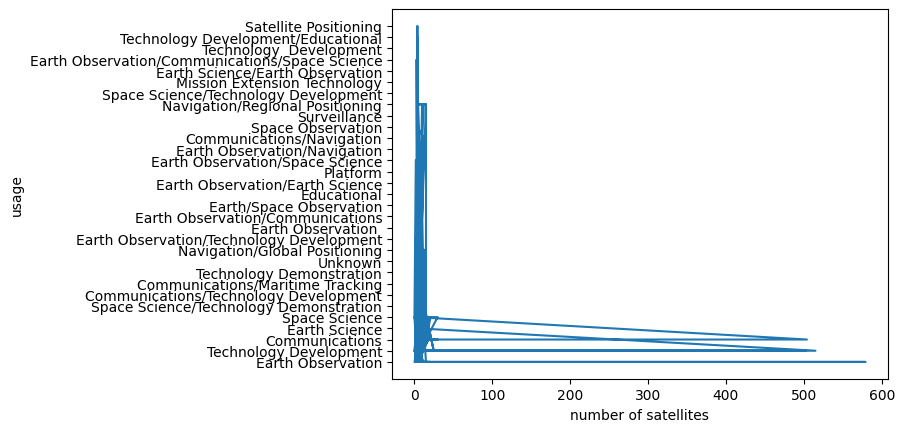

In [162]:
#aggregate feature columns and plot against target
#time-series forecast
sat_train1['Total'] = sat_train1[FEATURES].select_dtypes(include='number').sum(axis=1)
plt.plot(sat_train1['Total'], sat_train1['Purpose'])
plt.xlabel('number of satellites')
plt.ylabel('usage')
plt.show()

In [163]:
#separate categorical and numerical features
categorical_features = [col for col in FEATURES if sat_train1[col].dtype == 'object']
numerical_features = [col for col in FEATURES if sat_train1[col].dtype != 'object']
print(categorical_features)
print(numerical_features)

['Country/Org of UN Registry', 'Country of Operator/Owner', 'Users', 'Perigee (km)', 'Class of Orbit', 'Type of Orbit', 'Inclination (degrees)', 'Period (minutes)', 'Launch Mass (kg.)', 'Power (watts)', 'Launch Site', 'Detailed Purpose']
['Eccentricity', 'Expected Lifetime (yrs.)']


In [164]:
sat_train1.columns

Index(['Name of Satellite, Alternate Names',
       'Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Total'],
      dtype='object')

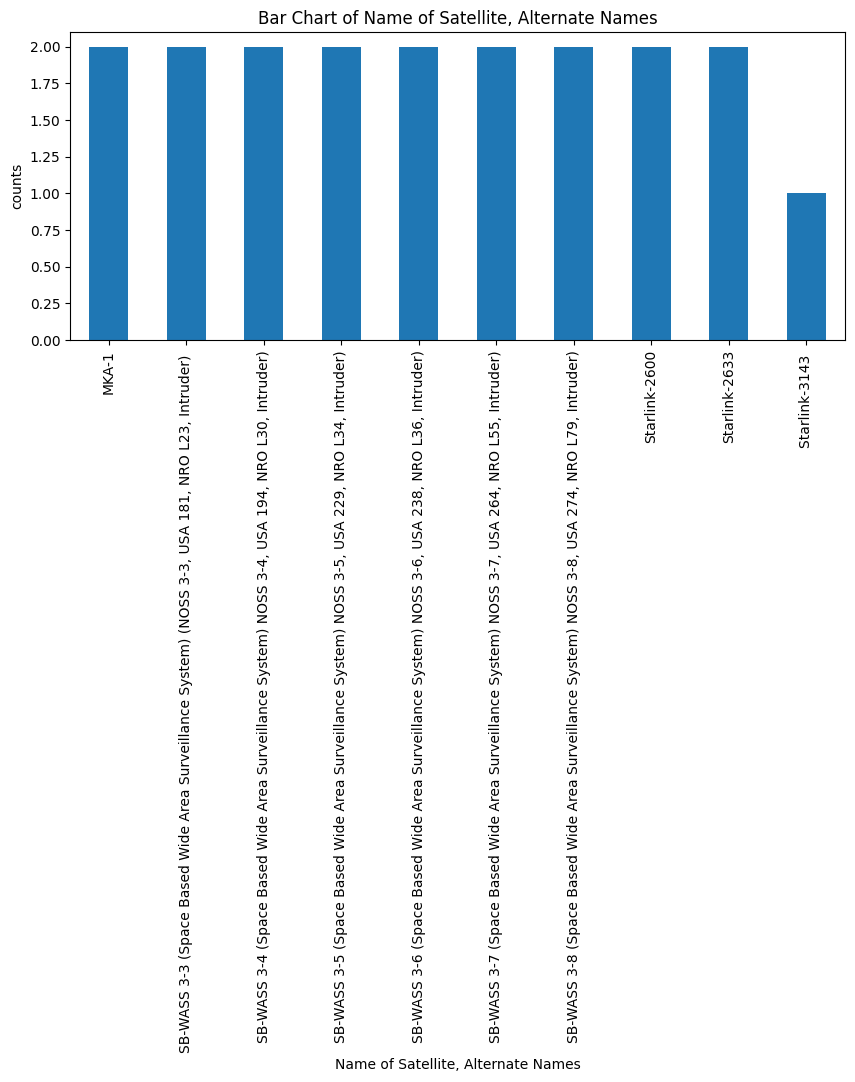

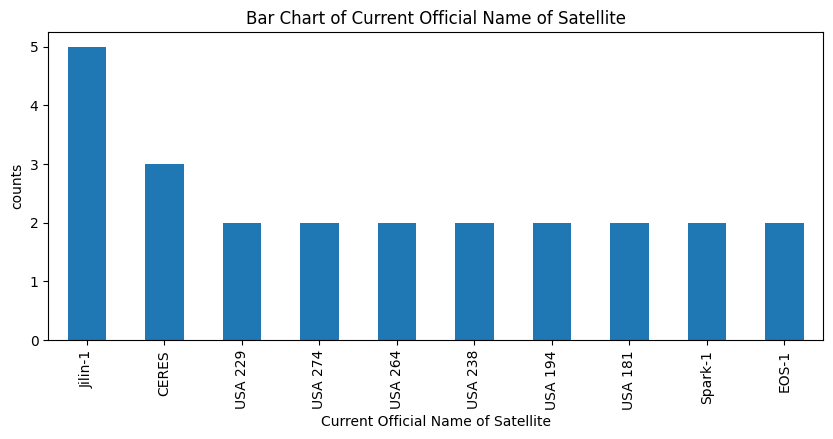

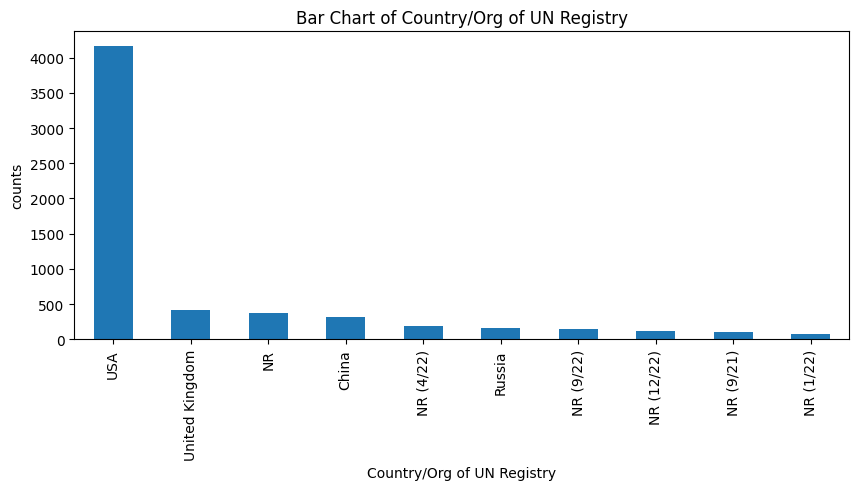

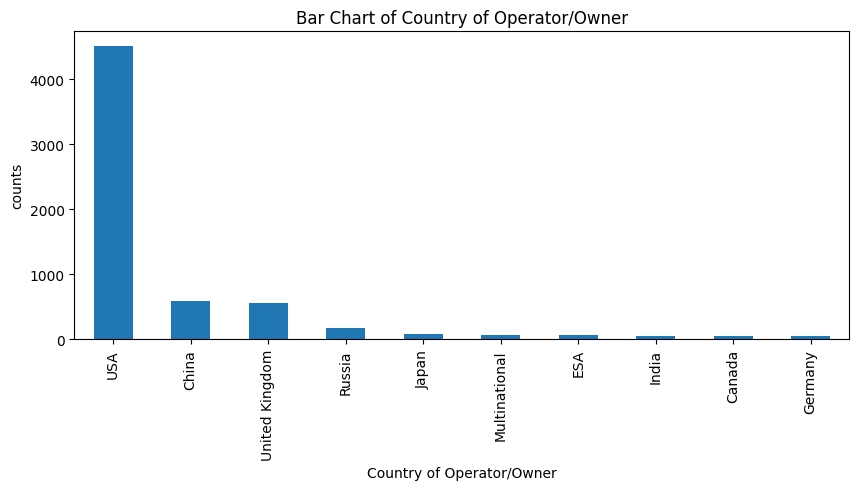

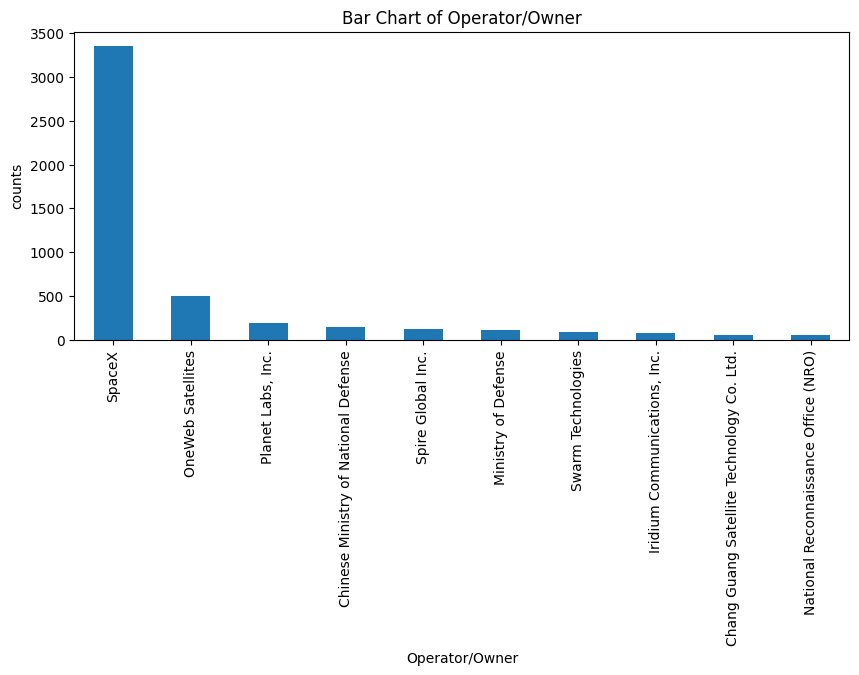

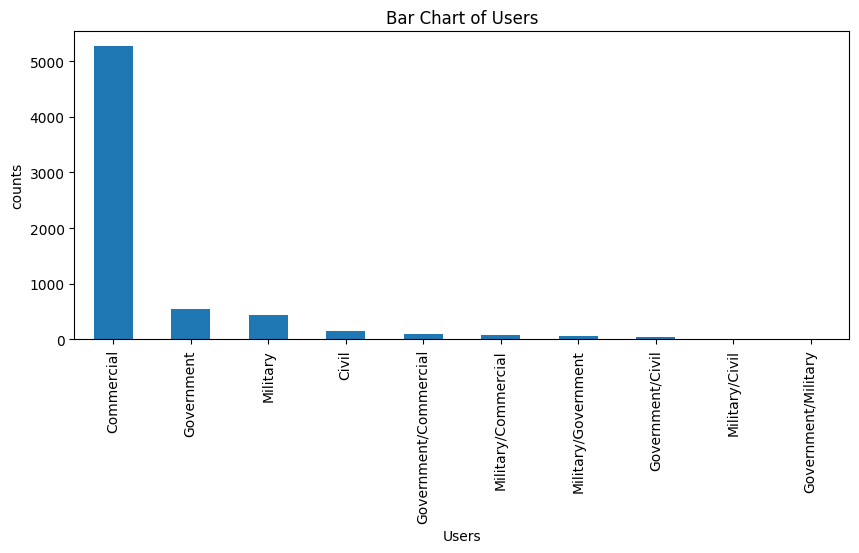

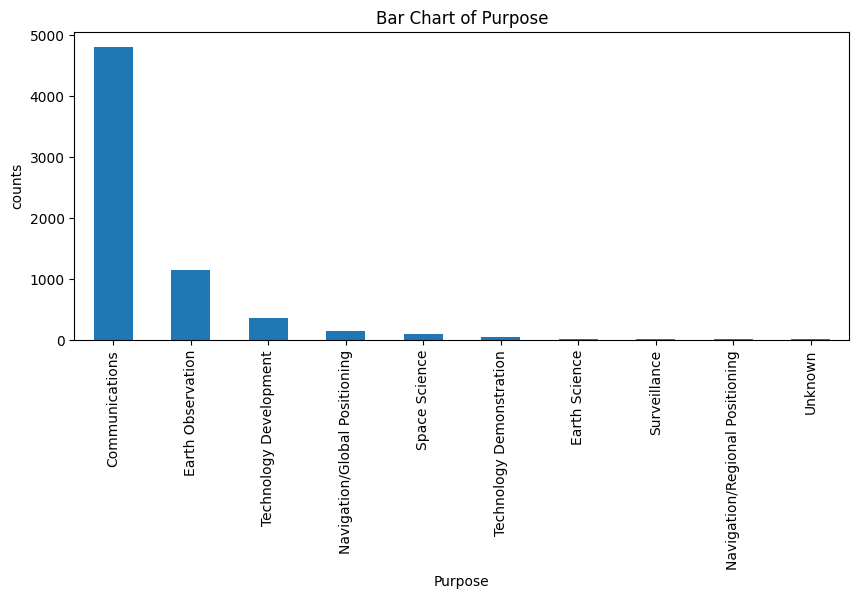

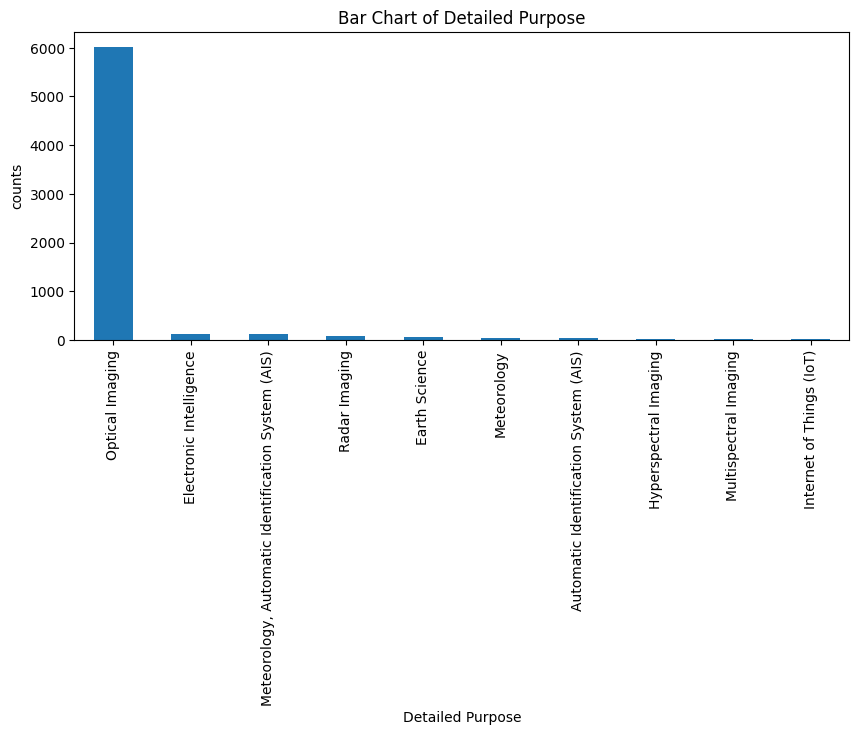

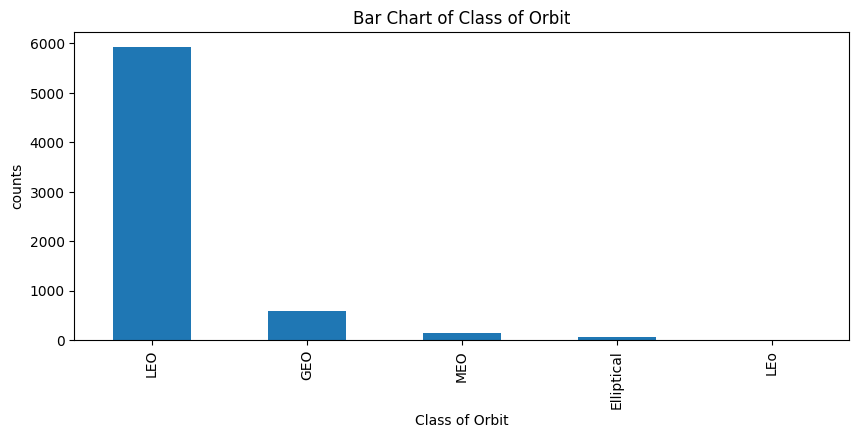

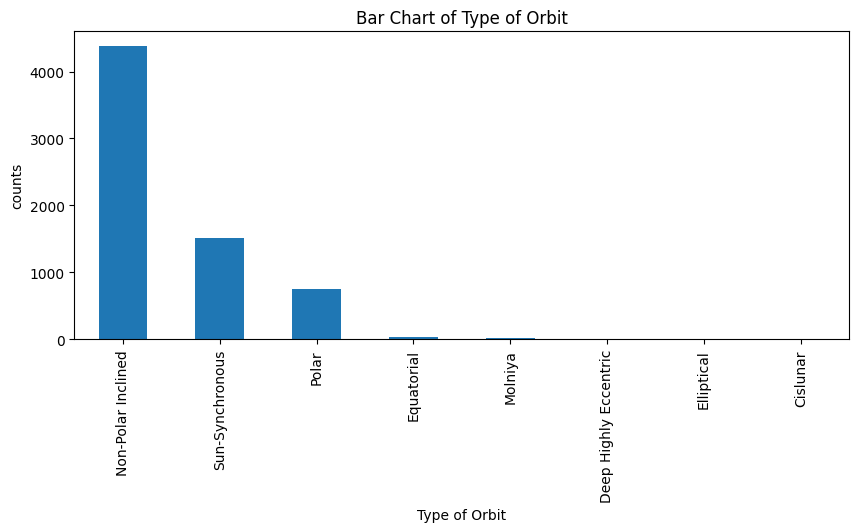

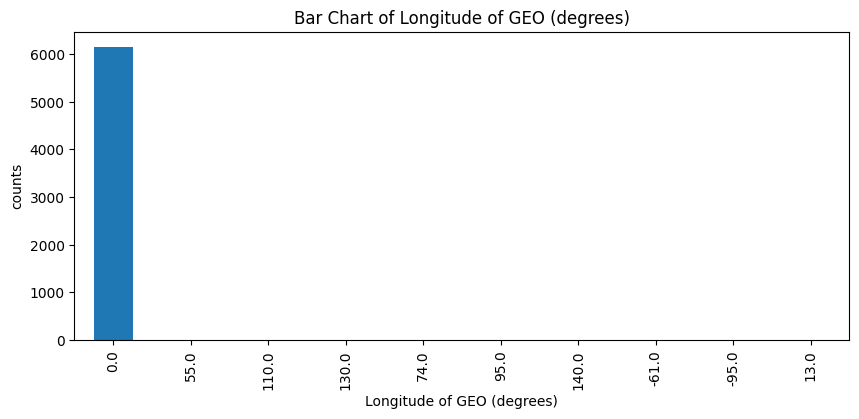

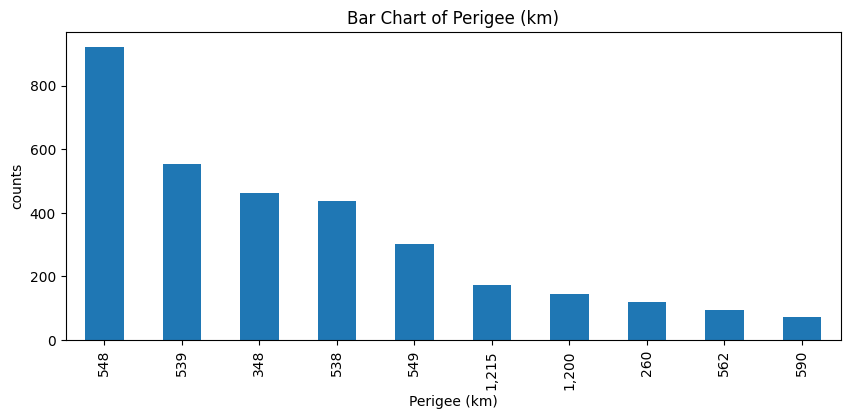

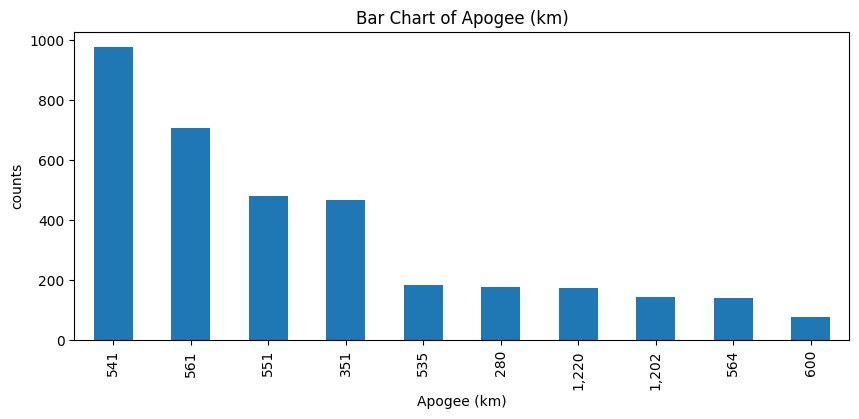

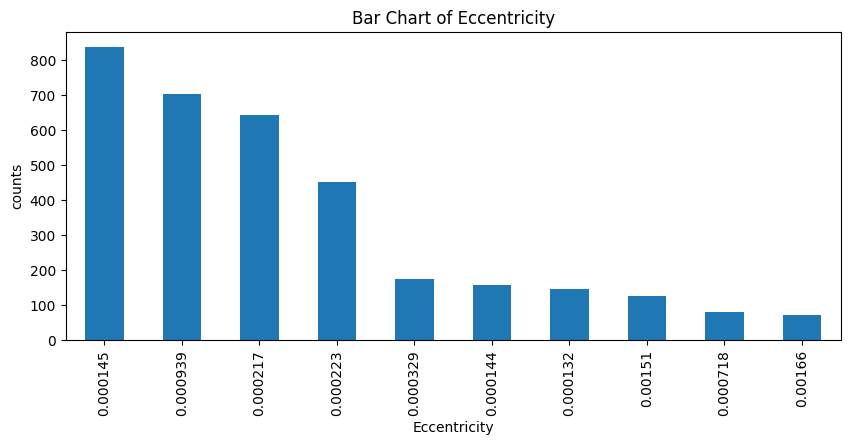

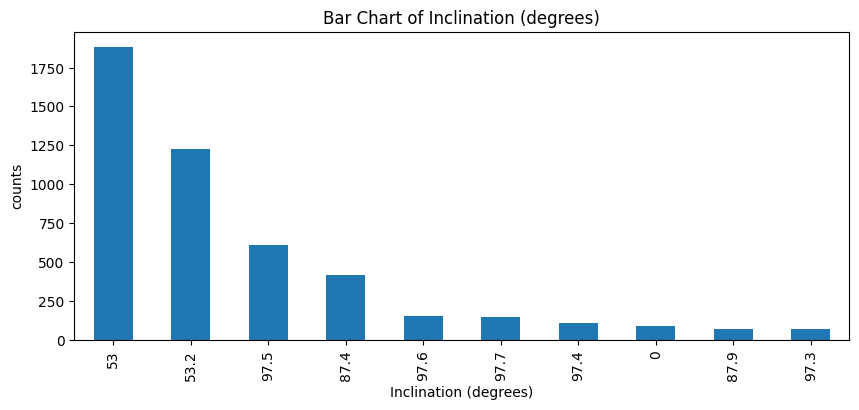

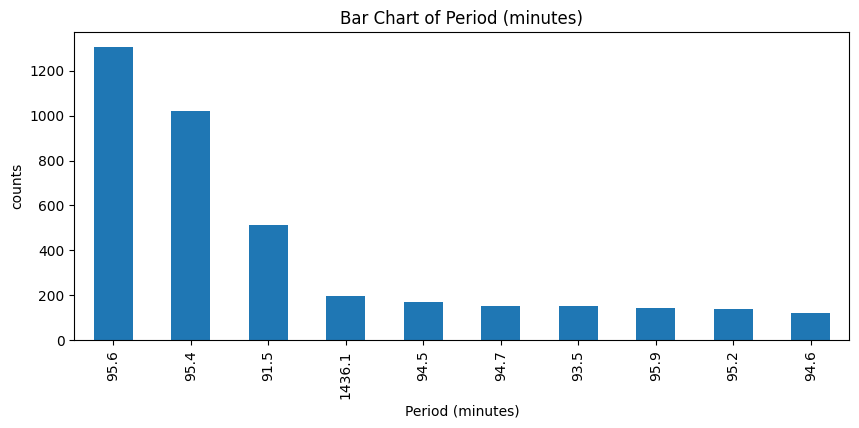

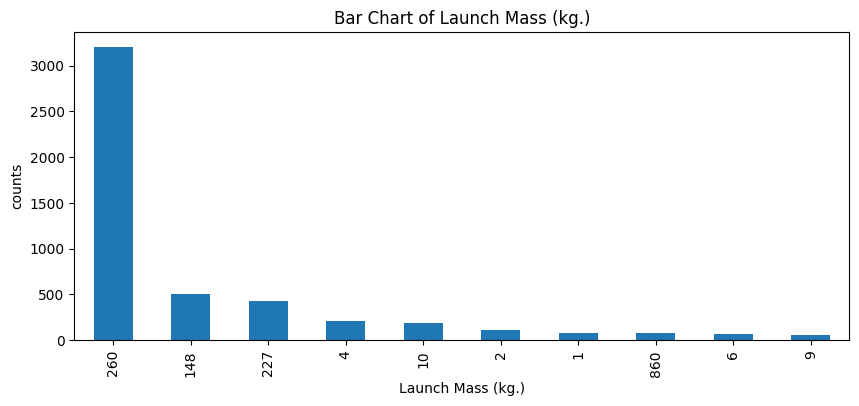

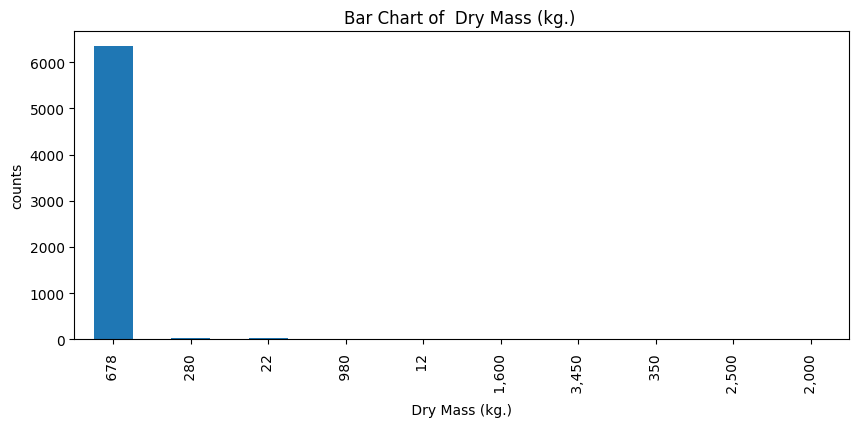

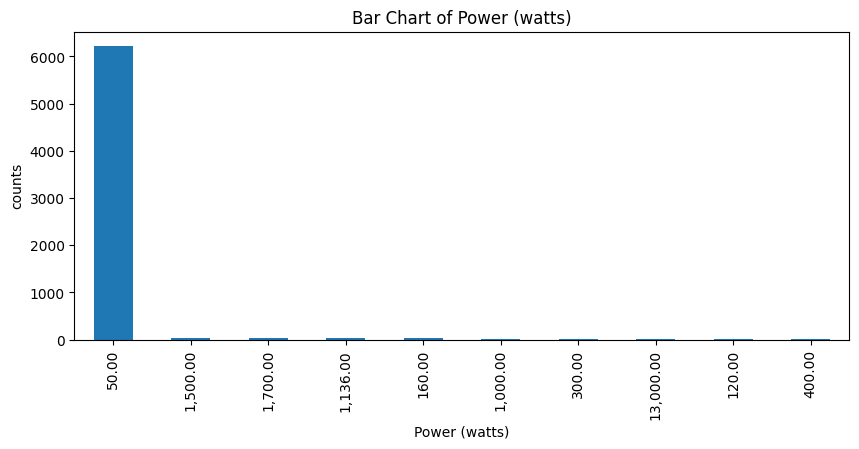

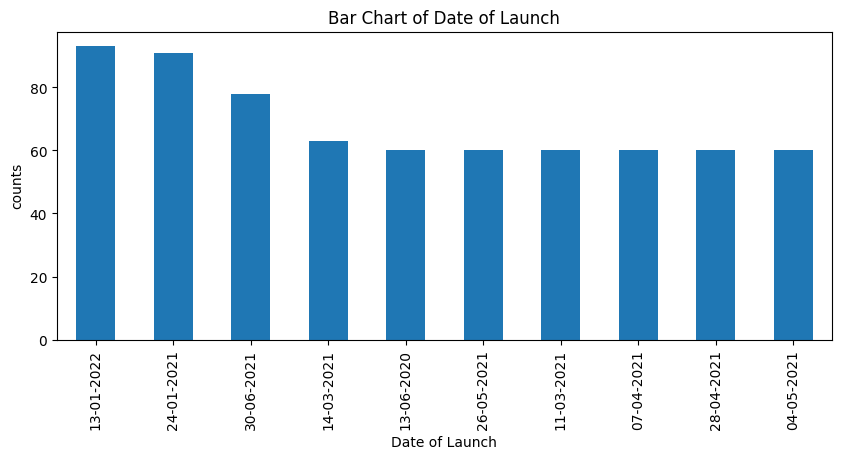

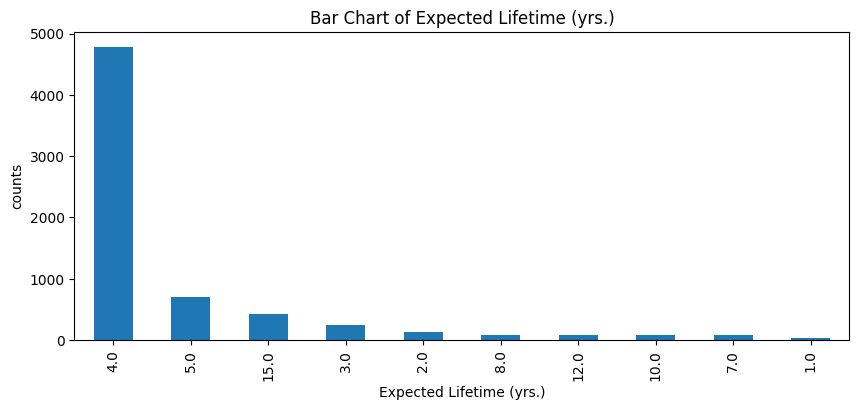

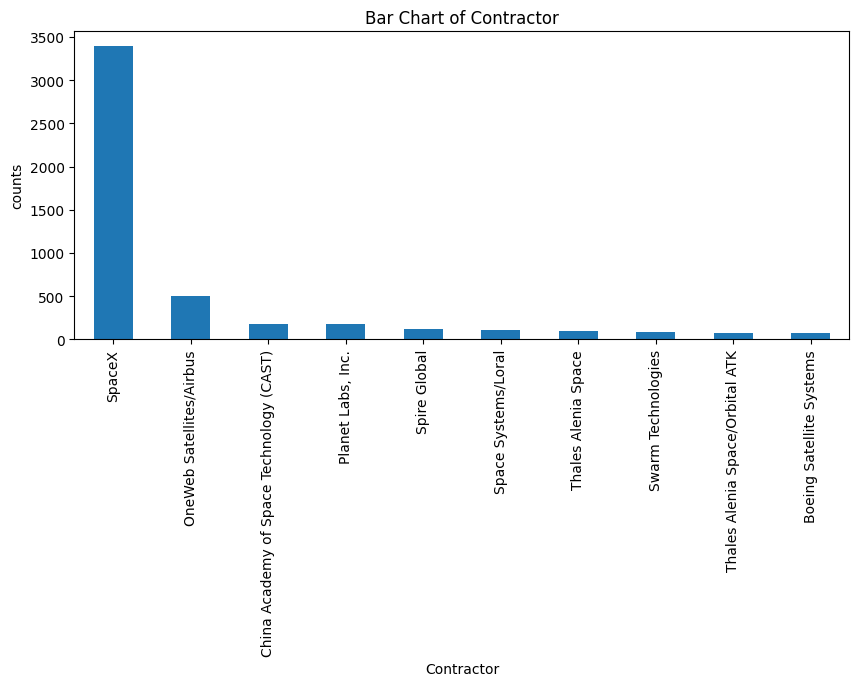

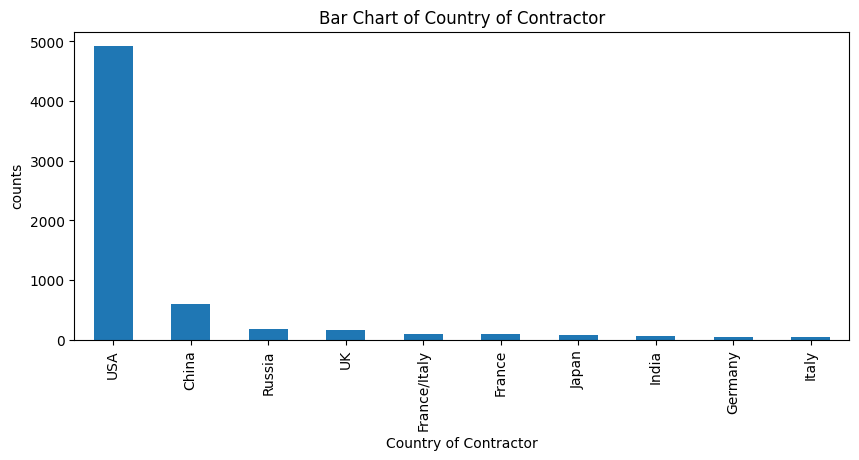

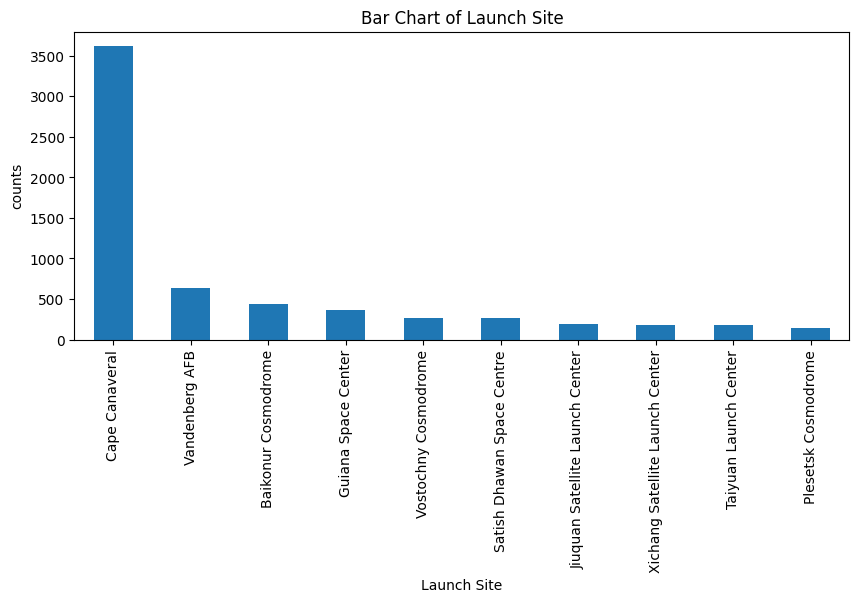

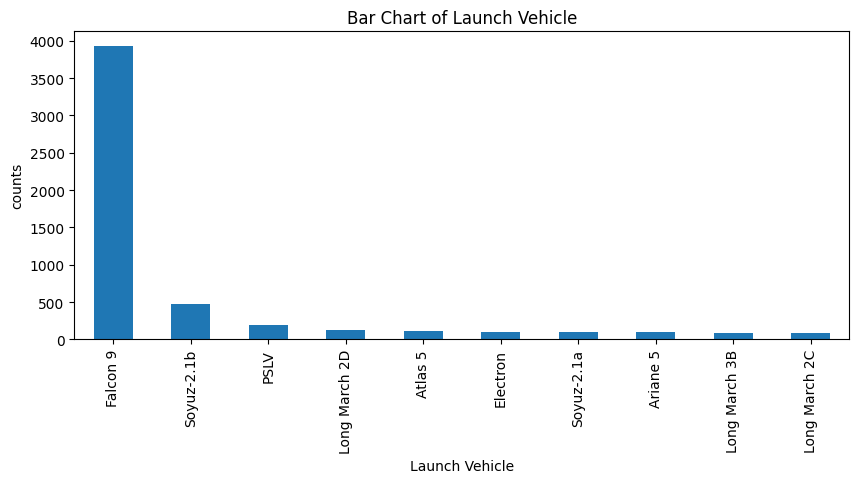

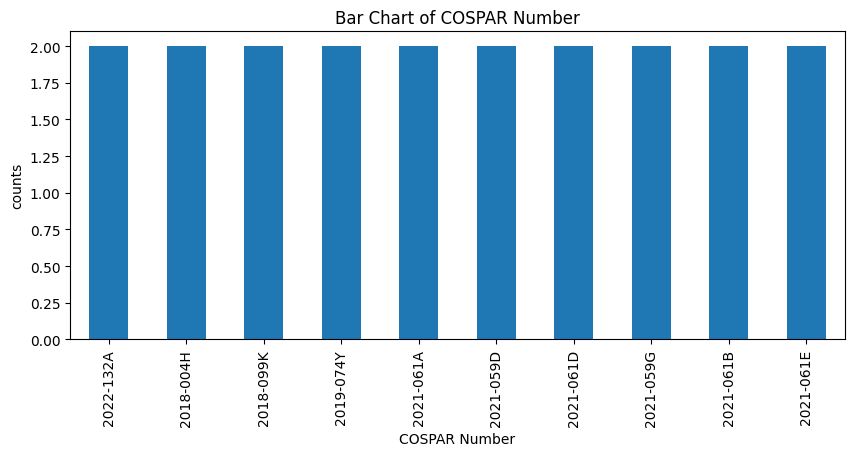

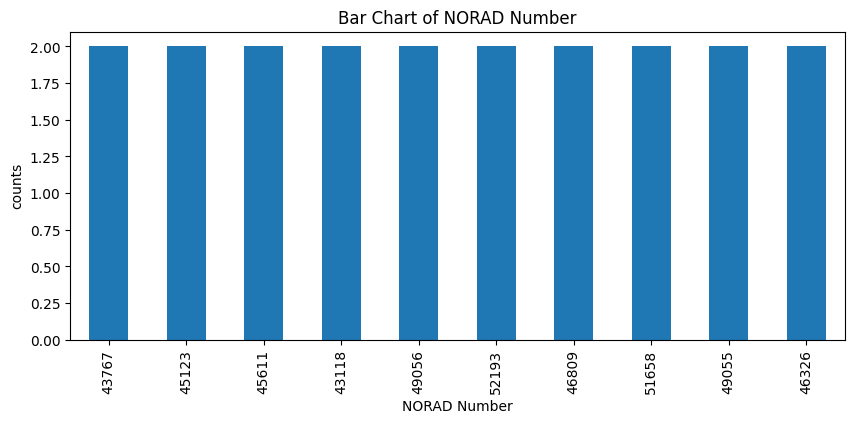

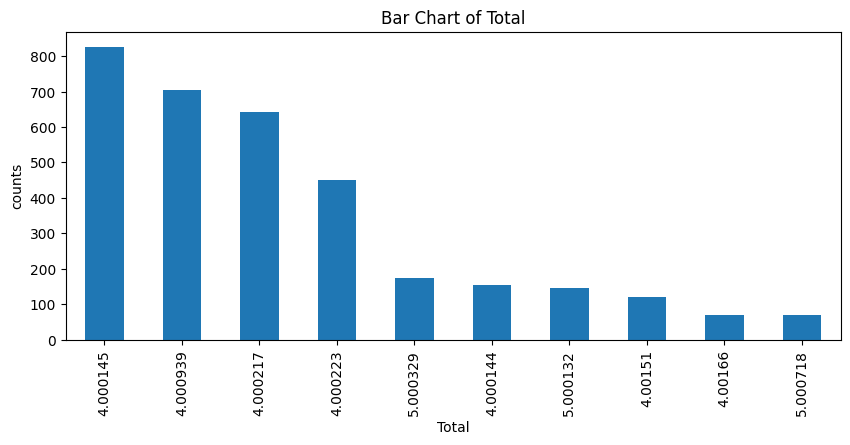

In [165]:
#box plot to detect outliers that may not be relevant to out analysis

#determine if column is numeric
def is_numeric(sat_train1, col):
    valid_data_types = {'int64', 'bool', 'uint64', 'float64', 'complex128'}
    return sat_train1[col].dtype in valid_data_types

def plot_data(sat_train1, col):
    if is_numeric(sat_train1, col): #plot bar chart for numeric columns
        sns.histplot(sat_train1[col].dropna(), kde=False, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    else:                           #plot bar chart for categorical column
        value_counts = sat_train1[col].value_counts().nlargest(10)
        value_counts.plot(kind='bar')
        plt.title(f'Bar Chart of {col}')
        plt.xlabel(col)
        plt.ylabel('counts')
    plt.show()
    
for column in sat_train1.columns:
    plt.figure(figsize=(10, 4))
    plot_data(sat_train1, column)
        
        

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#encode categorical variables
label_encoders = {}
for feature in FEATURES:
    if sat_train1[feature].dtype == 'object':
        le = LabelEncoder()
        sat_train1[feature] = le.fit_transform(sat_train1[feature])
        label_encoders[feature] = le  

In [169]:
#split dataset into training and testing sets
X = sat_train1[FEATURES]
y = TARGET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#check the shape of the training data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5374, 14), (1344, 14), (5374,), (1344,))

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

#Train dataset using Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

#predict on the test dataset
y_pred_rf = rf_model.predict(X_test)

In [183]:
#Evaluate the model
acc_score = accuracy_score(y_test, y_pred_rf)
class_rep_score = classification_report(y_test, y_pred_rf)
print(f"Accuracy score: {acc_score:.2f}")
print("Classification Report:\n", class_rep_score)

Accuracy score: 0.94
Classification Report:
                                           precision    recall  f1-score   support

                          Communications       0.98      0.98      0.98       960
        Communications/Maritime Tracking       1.00      0.50      0.67         2
   Communications/Technology Development       0.00      0.00      0.00         2
                       Earth Observation       0.88      0.95      0.92       239
                      Earth Observation        0.00      0.00      0.00         1
Earth Observation/Technology Development       0.00      0.00      0.00         3
                           Earth Science       0.00      0.00      0.00         5
            Mission Extension Technology       0.00      0.00      0.00         1
           Navigation/Global Positioning       1.00      1.00      1.00        29
                                Platform       0.00      0.00      0.00         1
                       Space Observation       1.00 

C:\Users\ajibo\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajibo\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajibo\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
